In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np
import os
from IPython.display import clear_output
from qiskit import QuantumCircuit
from qiskit.algorithms.optimizers import COBYLA
from qiskit.circuit import ParameterVector
from qiskit.circuit.library import ZFeatureMap
from qiskit.quantum_info import SparsePauliOp
from qiskit.utils import algorithm_globals
from qiskit_machine_learning.algorithms.classifiers import NeuralNetworkClassifier
from qiskit_machine_learning.neural_networks import EstimatorQNN
from sklearn.model_selection import train_test_split
from PIL import Image
algorithm_globals.random_seed = 12345

In [2]:
def create_dataset():
    print (os.getcwd())
    directoryName= "Projects/IMFDB_2People/Face_Celebs/";
    directory = os.listdir(directoryName)
    train_size = 0
    for label in directory:
        train_size = train_size + len(os.listdir(directoryName+str(label)));
    print (train_size)
    count = 0
    pixelx = 100
    pixely = 100
#Depending on the size, X(Features) and Y(Labels) get initialized to zero.
    train_data_X = np.zeros((train_size,pixelx,pixely),dtype=np.float32)
    print(train_data_X.shape)
#train_data_Y = np.zeros((train_size,9),dtype=float)
    train_data_Y= np.zeros((train_size),dtype=np.int32)
#It loads the true values and puts it in the train_data_X and sets train_data_y=1 ;

    for label in directory:
        images = os.listdir(directoryName+str(label))
        for i in images:
            mypath = directoryName+str(label)+'/'+i
            img = np.array(Image.open(mypath).convert('L').resize((100, 100), Image.LANCZOS))
            normalized_data=(img-img.min())/(img.max()-img.min())
            train_data_X[count]=(normalized_data);#normalizes the data
            train_data_Y[count] = (directory.index(label))
            count = count+1
    return train_data_X , train_data_Y, directory

In [3]:
def visualize_dataset():
    dataset,labels,directory=create_dataset()
    permutation = np.random.permutation(labels.shape[0])
    train_dataset = dataset[permutation,:,:]
    train_labels = labels[permutation]
    print (train_dataset.shape)
    for i in range(0,len(train_dataset[:10])):
        print(train_labels[i],':',directory[train_labels[i]])
        plt.imshow(train_dataset[i],cmap='gray');
        plt.show()

C:\Users\ramki\Desktop\Volante\IITD_QM_ML_Course
528
(528, 100, 100)
(528, 100, 100)
1 : Hrithik Roshan


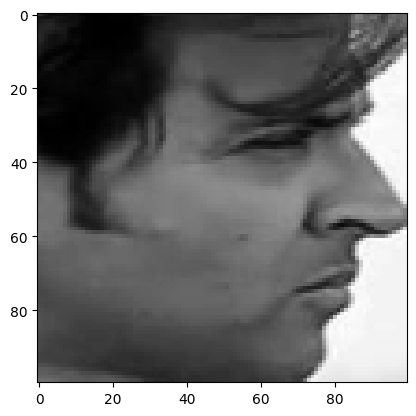

0 : Aamir_Khan


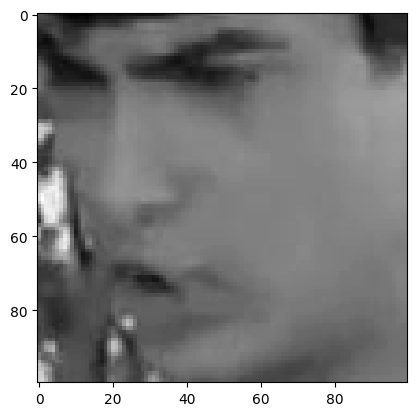

0 : Aamir_Khan


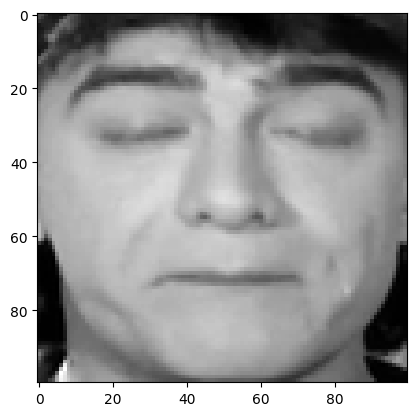

0 : Aamir_Khan


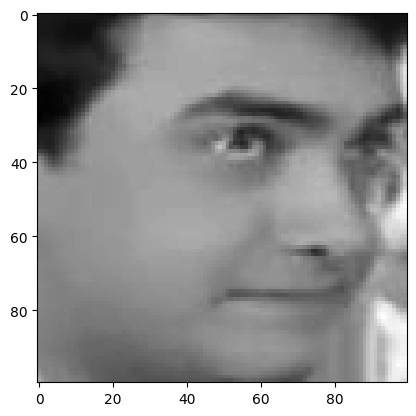

1 : Hrithik Roshan


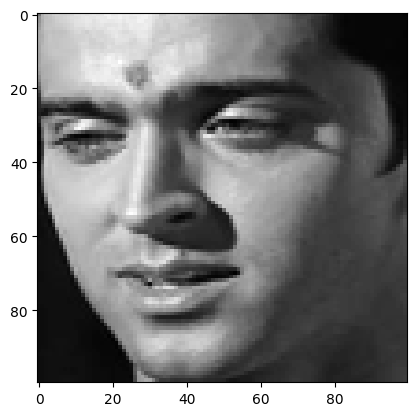

1 : Hrithik Roshan


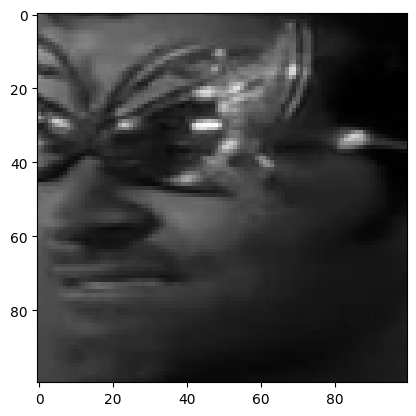

1 : Hrithik Roshan


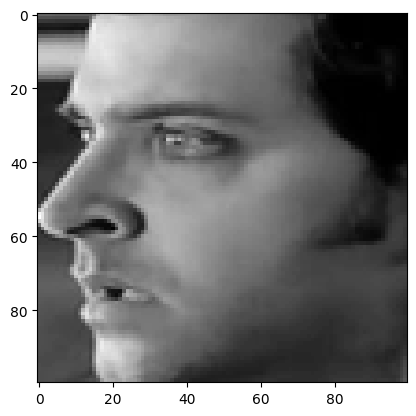

0 : Aamir_Khan


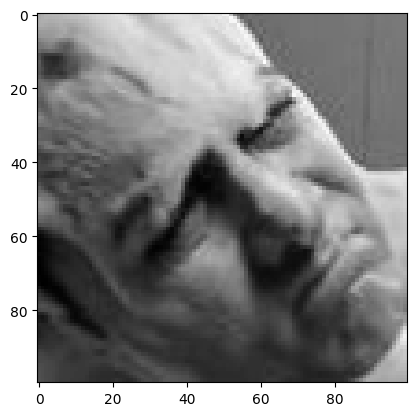

0 : Aamir_Khan


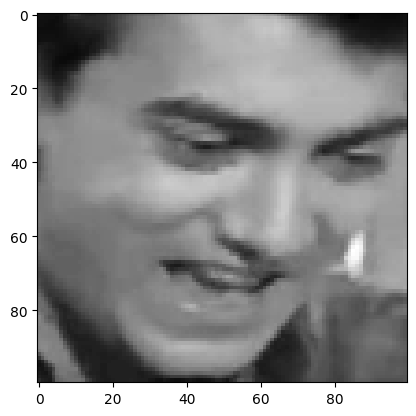

0 : Aamir_Khan


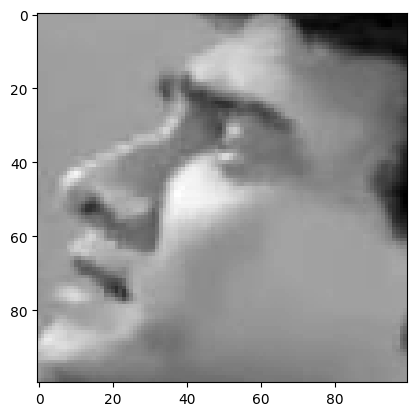

In [4]:
visualize_dataset()

In [5]:
def generate_dataset_for_QCNN():
    output_images=[]
    output_labels=[]
    print (os.getcwd())
    directoryName= "Projects/IMFDB_2People/Face_Celebs/";
    directory = os.listdir(directoryName);
    print(directory)
    train_size = 0;
    for label in directory:
        train_size = train_size + len(os.listdir(directoryName+str(label)))
    print (train_size)
    count = 0
    pixel_x = 4 #change the pixel size if the data set changes
    pixel_y = 2

    for label in directory:
        images = os.listdir(directoryName+str(label))
        for i in images:
            mypath = directoryName+str(label)+'/'+i
            #print(mypath)
            img = np.array(Image.open(mypath).convert('L').resize((pixel_x, pixel_y), Image.LANCZOS));
            normalized_data=(img-img.min())/(img.max()-img.min())
            flatten_data=normalized_data.flatten()
            #print("normalized_data shape",normalized_data.shape)
            #print("flatten_data shape",flatten_data.shape)
            output_images.append(flatten_data)
            if(label=="Aamir_Khan"):
                output_labels.append(1)
            else:
                output_labels.append(-1)
            count = count+1
    return output_images,output_labels,normalized_data

In [6]:
def visualize_QCNN_dataset():
    images, labels,without_flat_images = generate_dataset_for_QCNN()
    print(len(images))
    print(len(labels))
    train_images, test_images, train_labels, test_labels = train_test_split(
    images, labels, test_size=0.3)
    print(len(train_images))
    print(len(train_labels))
    print(train_labels)
    plt.subplots_adjust(wspace=0.1, hspace=0.025)
    for i in range(0,10):
        print(train_labels[i])
        plt.imshow(train_images[i].reshape(4, 2),cmap='gray')
        plt.show()
    return train_images, test_images, train_labels, test_labels

C:\Users\ramki\Desktop\Volante\IITD_QM_ML_Course
['Aamir_Khan', 'Hrithik Roshan']
528
528
528
369
369
[1, -1, -1, -1, 1, 1, 1, -1, -1, -1, -1, -1, 1, -1, -1, -1, 1, -1, 1, 1, -1, 1, 1, 1, -1, -1, -1, -1, 1, -1, -1, 1, 1, 1, -1, 1, 1, -1, 1, -1, -1, 1, 1, 1, 1, -1, 1, -1, 1, 1, -1, -1, -1, 1, 1, 1, -1, -1, -1, -1, 1, 1, 1, -1, -1, -1, 1, -1, 1, -1, -1, 1, 1, 1, 1, 1, -1, 1, -1, 1, -1, -1, -1, 1, 1, -1, -1, 1, -1, 1, 1, 1, 1, -1, 1, 1, 1, 1, -1, -1, 1, -1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, -1, -1, -1, -1, -1, 1, 1, 1, -1, -1, -1, 1, 1, 1, 1, 1, 1, -1, -1, 1, -1, -1, -1, -1, 1, -1, 1, 1, -1, -1, -1, 1, -1, -1, 1, -1, -1, -1, -1, -1, -1, 1, 1, -1, -1, -1, -1, -1, 1, 1, 1, 1, -1, -1, 1, 1, 1, 1, -1, 1, -1, 1, -1, -1, -1, 1, 1, -1, 1, 1, -1, -1, 1, -1, 1, 1, -1, -1, -1, 1, -1, 1, 1, -1, 1, 1, -1, -1, 1, 1, 1, -1, 1, 1, -1, -1, 1, 1, -1, -1, -1, 1, -1, -1, 1, -1, 1, 1, 1, 1, 1, 1, -1, 1, -1, 1, 1, -1, 1, 1, 1, 1, 1, 1, -1, -1, 1, 1, 1, -1, 1, 1, -1, 1, -1, 1, -1, 1, -1, 1, 1, -1,

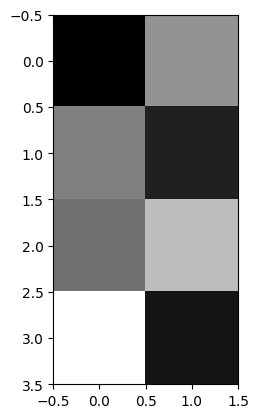

-1


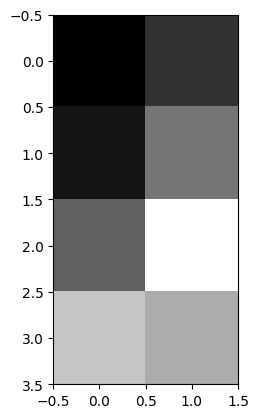

-1


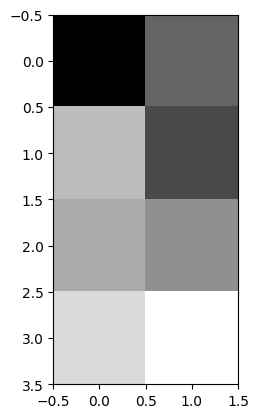

-1


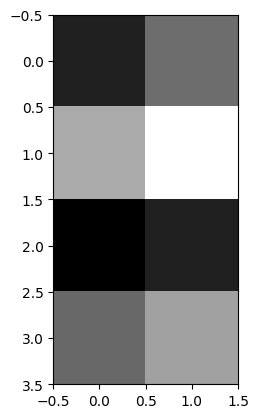

1


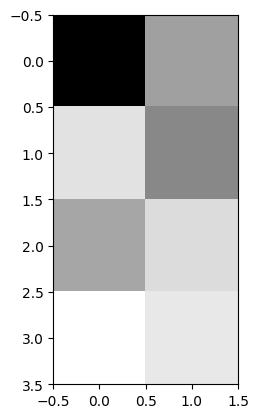

1


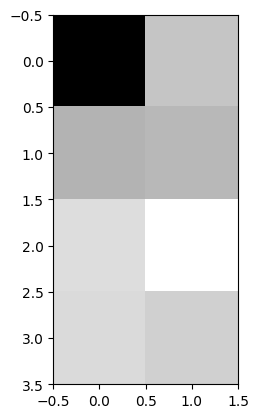

1


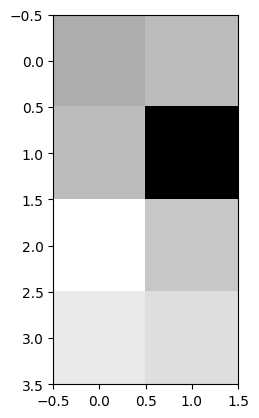

-1


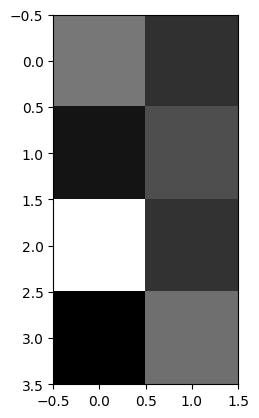

-1


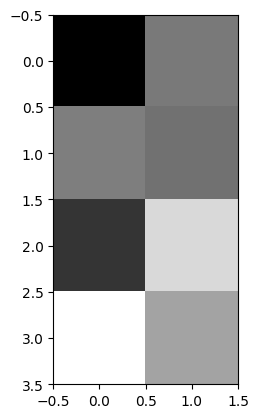

-1


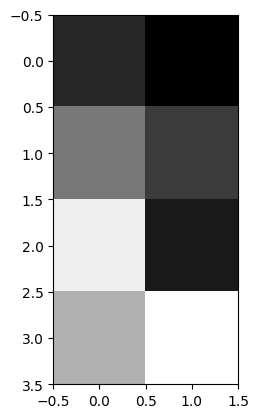

In [7]:
train_images, test_images, train_labels, test_labels=visualize_QCNN_dataset()

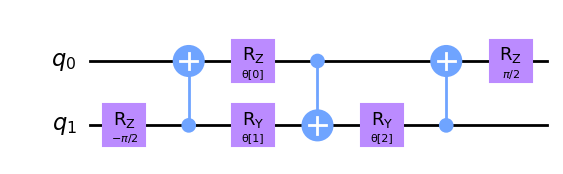

In [8]:
# We now define a two qubit unitary as defined in [3]
def conv_circuit(params):
    target = QuantumCircuit(2)
    target.rz(-np.pi / 2, 1)
    target.cx(1, 0)
    target.rz(params[0], 0)
    target.ry(params[1], 1)
    target.cx(0, 1)
    target.ry(params[2], 1)
    target.cx(1, 0)
    target.rz(np.pi / 2, 0)
    return target


# Let's draw this circuit and see what it looks like
params = ParameterVector("θ", length=3)
circuit = conv_circuit(params)
circuit.draw("mpl")

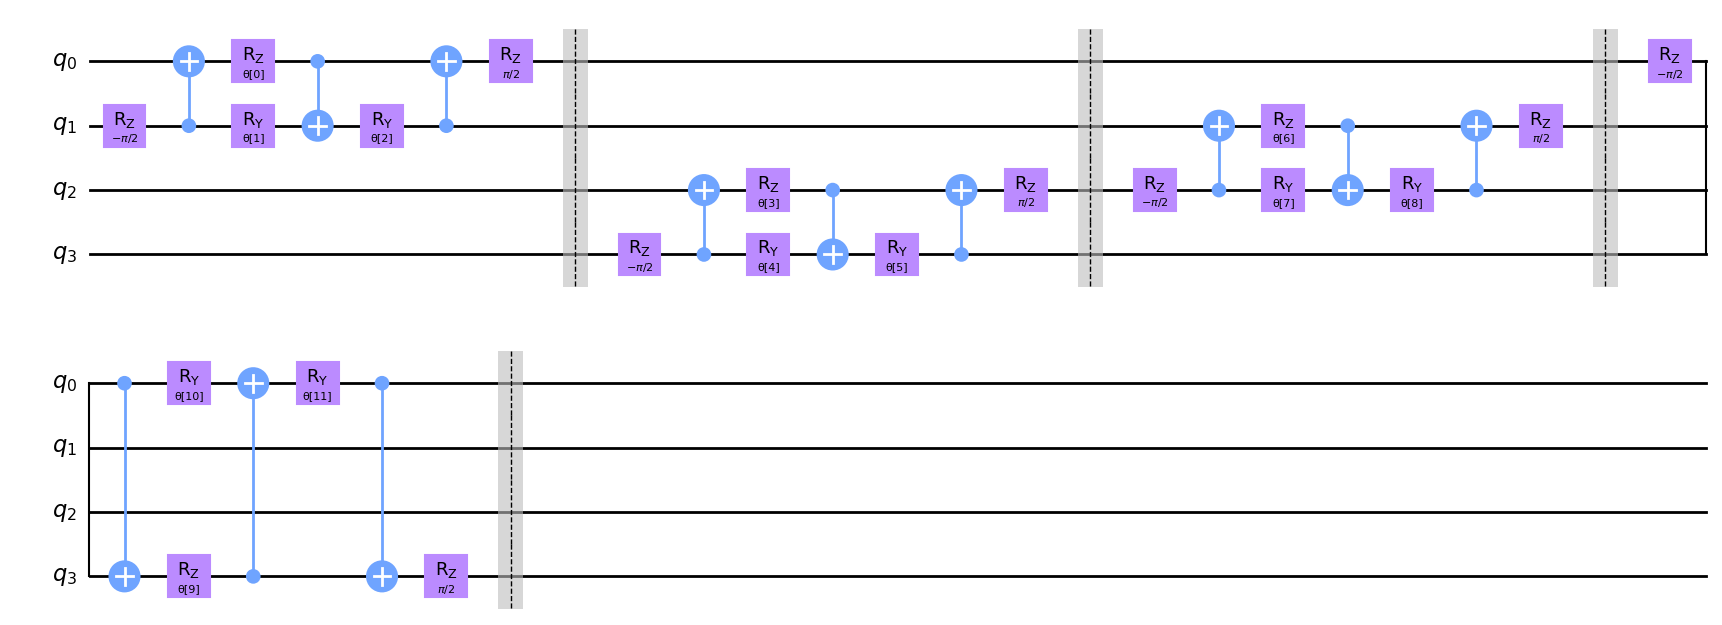

In [9]:
def conv_layer(num_qubits, param_prefix):
    qc = QuantumCircuit(num_qubits, name="Convolutional Layer")
    qubits = list(range(num_qubits))
    param_index = 0
    params = ParameterVector(param_prefix, length=num_qubits * 3)
    for q1, q2 in zip(qubits[0::2], qubits[1::2]):
        qc = qc.compose(conv_circuit(params[param_index : (param_index + 3)]), [q1, q2])
        qc.barrier()
        param_index += 3
    for q1, q2 in zip(qubits[1::2], qubits[2::2] + [0]):
        qc = qc.compose(conv_circuit(params[param_index : (param_index + 3)]), [q1, q2])
        qc.barrier()
        param_index += 3

    qc_inst = qc.to_instruction()

    qc = QuantumCircuit(num_qubits)
    qc.append(qc_inst, qubits)
    return qc


circuit = conv_layer(4, "θ")
circuit.decompose().draw("mpl")

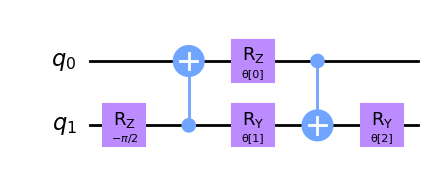

In [10]:
def pool_circuit(params):
    target = QuantumCircuit(2)
    target.rz(-np.pi / 2, 1)
    target.cx(1, 0)
    target.rz(params[0], 0)
    target.ry(params[1], 1)
    target.cx(0, 1)
    target.ry(params[2], 1)

    return target


params = ParameterVector("θ", length=3)
circuit = pool_circuit(params)
circuit.draw("mpl")

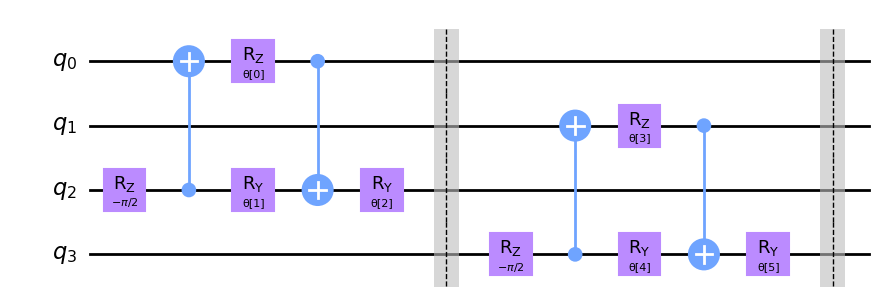

In [11]:
def pool_layer(sources, sinks, param_prefix):
    num_qubits = len(sources) + len(sinks)
    qc = QuantumCircuit(num_qubits, name="Pooling Layer")
    param_index = 0
    params = ParameterVector(param_prefix, length=num_qubits // 2 * 3)
    for source, sink in zip(sources, sinks):
        qc = qc.compose(pool_circuit(params[param_index : (param_index + 3)]), [source, sink])
        qc.barrier()
        param_index += 3

    qc_inst = qc.to_instruction()

    qc = QuantumCircuit(num_qubits)
    qc.append(qc_inst, range(num_qubits))
    return qc


sources = [0, 1]
sinks = [2, 3]
circuit = pool_layer(sources, sinks, "θ")
circuit.decompose().draw("mpl")

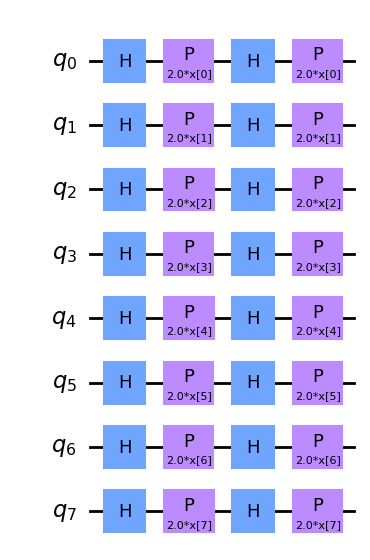

In [21]:
feature_map = ZFeatureMap(8)
feature_map.decompose().draw("mpl")

In [13]:
feature_map = ZFeatureMap(8)

ansatz = QuantumCircuit(8, name="Ansatz")

# First Convolutional Layer
ansatz.compose(conv_layer(8, "с1"), list(range(8)), inplace=True)

# First Pooling Layer
ansatz.compose(pool_layer([0, 1, 2, 3], [4, 5, 6, 7], "p1"), list(range(8)), inplace=True)

# Second Convolutional Layer
ansatz.compose(conv_layer(4, "c2"), list(range(4, 8)), inplace=True)

# Second Pooling Layer
ansatz.compose(pool_layer([0, 1], [2, 3], "p2"), list(range(4, 8)), inplace=True)

# Third Convolutional Layer
ansatz.compose(conv_layer(2, "c3"), list(range(6, 8)), inplace=True)

# Third Pooling Layer
ansatz.compose(pool_layer([0], [1], "p3"), list(range(6, 8)), inplace=True)

# Combining the feature map and ansatz
circuit = QuantumCircuit(8)
circuit.compose(feature_map, range(8), inplace=True)
circuit.compose(ansatz, range(8), inplace=True)

observable = SparsePauliOp.from_list([("Z" + "I" * 7, 1)])

# we decompose the circuit for the QNN to avoid additional data copying
qnn = EstimatorQNN(
    circuit=circuit.decompose(),
    observables=observable,
    input_params=feature_map.parameters,
    weight_params=ansatz.parameters,
)

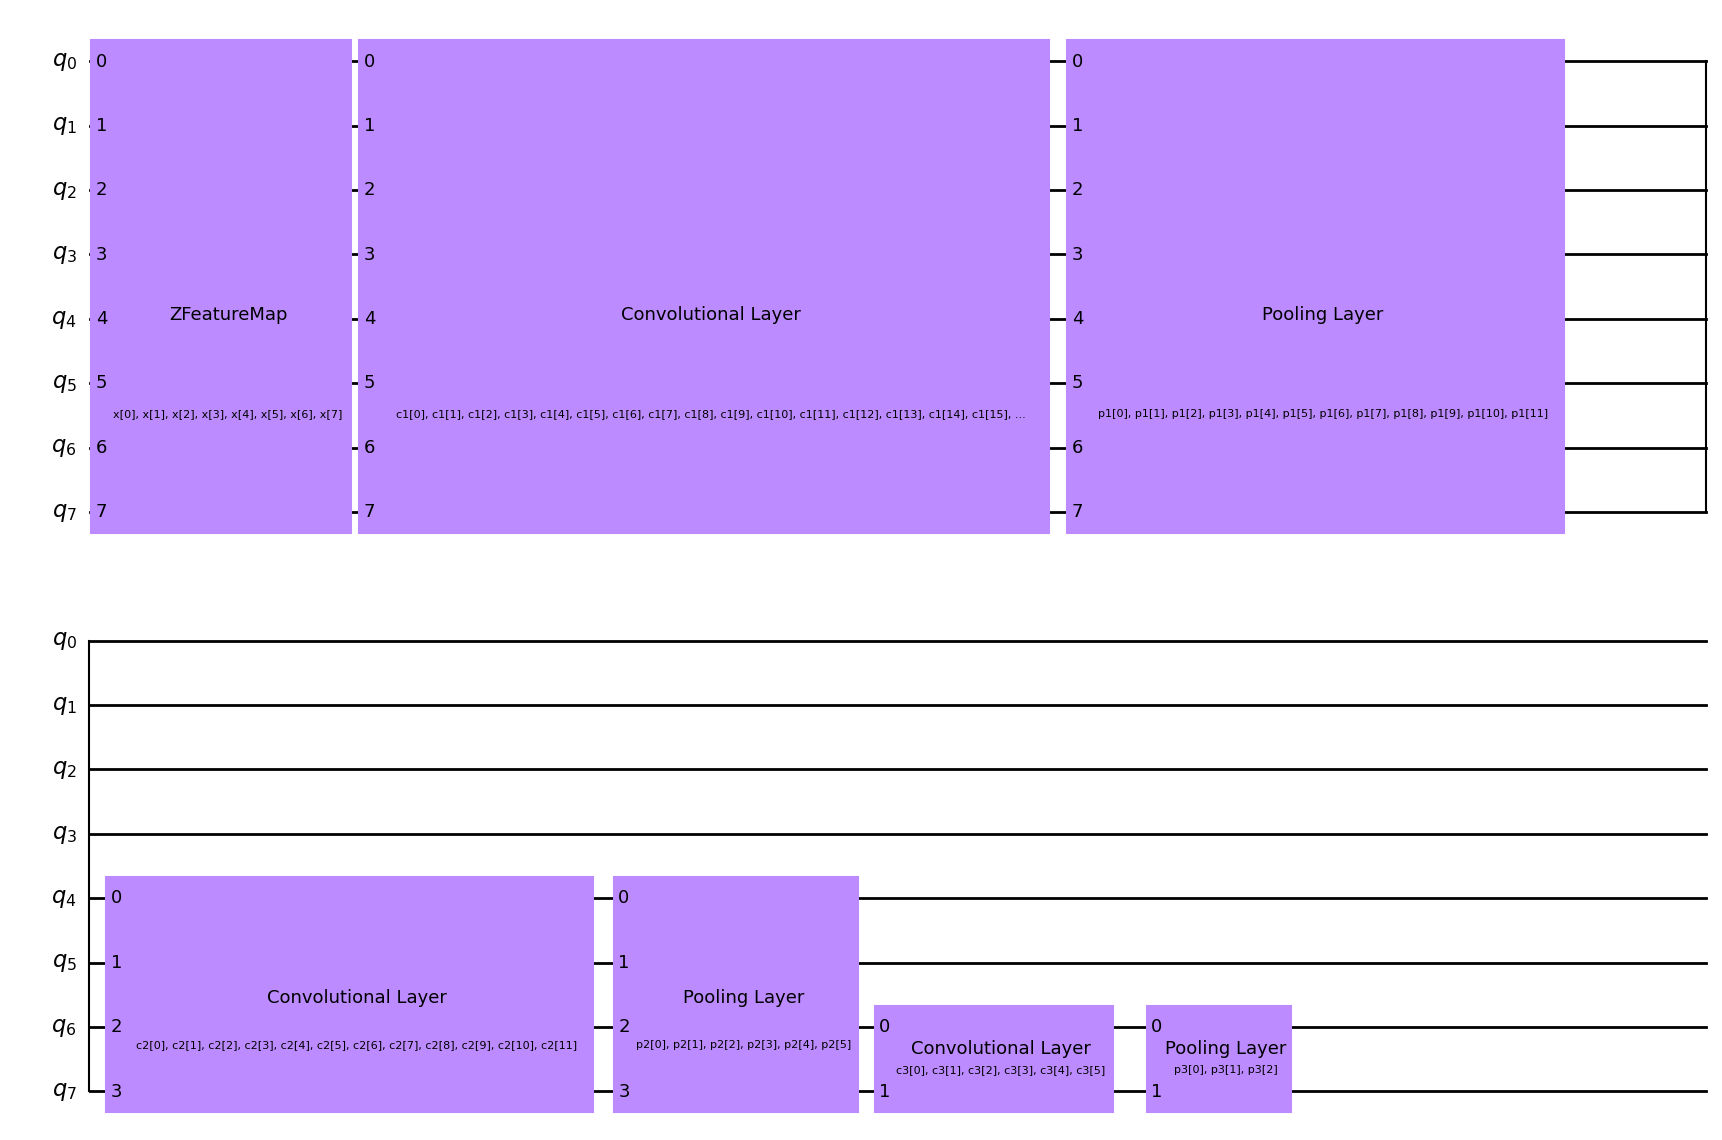

In [14]:
circuit.draw("mpl")

In [15]:
def callback_graph(weights, obj_func_eval):
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    plt.title("Objective function value against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()

In [16]:
classifier = NeuralNetworkClassifier(
    qnn,
    optimizer=COBYLA(maxiter=200),  # Set max iterations here
    callback=callback_graph
)

In [17]:
x = np.asarray(train_images)
y = np.asarray(train_labels)

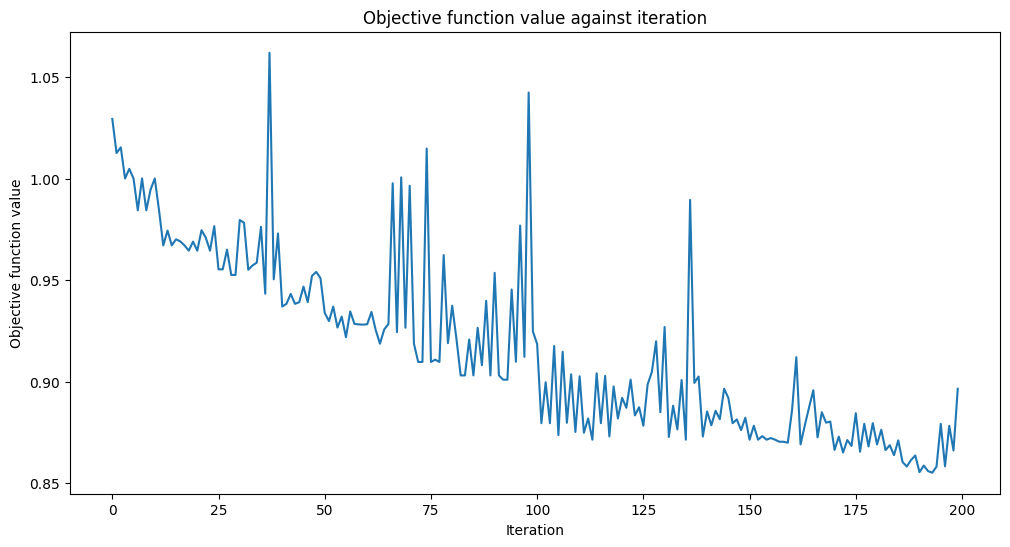

Accuracy from the train data : 63.14%


In [18]:
objective_func_vals = []
plt.rcParams["figure.figsize"] = (12, 6)
classifier.fit(x, y)

# score classifier
print(f"Accuracy from the train data : {np.round(100 * classifier.score(x, y), 2)}%")

Accuracy from the test data : 62.26%


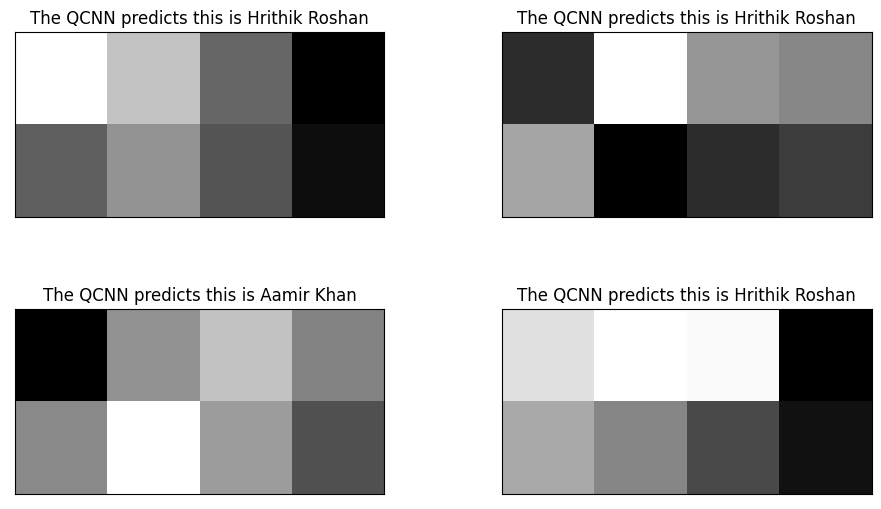

In [19]:
y_predict = classifier.predict(test_images)
x = np.asarray(test_images)
y = np.asarray(test_labels)
print(f"Accuracy from the test data : {np.round(100 * classifier.score(x, y), 2)}%")

#Let's see some examples in our dataset

fig, ax = plt.subplots(2, 2, figsize=(12, 6), subplot_kw={"xticks": [], "yticks": []})
for i in range(0, 4):
    ax[i // 2, i % 2].imshow(test_images[i].reshape(2, 4),cmap='gray')
    if y_predict[i] == -1:
        ax[i // 2, i % 2].set_title("The QCNN predicts this is Hrithik Roshan")
    if y_predict[i] == +1:
        ax[i // 2, i % 2].set_title("The QCNN predicts this is Aamir Khan")
plt.subplots_adjust(wspace=0.1, hspace=0.5)